<a href="https://colab.research.google.com/github/EdBerg21/AI-Based-Fraud-Detection/blob/main/bringing_old_photo_back_to_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#◢ Bringing Old Photos Back to Life

This is a reference implementation of our CVPR 2020 paper [1], which  revives an old photo to modern style. Should you be making use of our work, please cite our paper [1].



---


#◢ Verify Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU


#◢ Git clone


In [1]:
# Force of habit. I always want to guarantee we're in the correct directory
%cd /content
!rm -rf /content/photo_restoration
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git --depth=1 /content/photo_restoration

/content
Cloning into '/content/photo_restoration'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 113 (delta 12), reused 53 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 38.90 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (12/12), done.


#◢ Set up the environment


In [2]:
# pull the syncBN repo
%cd /content/photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd ./Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd ./Face_Enhancement/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/face_checkpoints.zip
!unzip face_checkpoints.zip
%cd ../

%cd ./Global/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/global_checkpoints.zip
!unzip global_checkpoints.zip
%cd ../

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161 (from 1)
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161 (from 1)
Receiving objects: 100% (188/188), 47.20 KiB | 11.80 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2025-02-24 19:08:13--  http://dlib.net/files/shape_predic

In [3]:
%cd /content/photo_restoration
!pip install -r requirements.txt

/content/photo_restoration
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━

#◢ Run the code

### Restore photos (normal mode)

If you get the following error, refer to [this](https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/issues/231) issue on Github:
```
Running Stage 4: Blending
Traceback (most recent call last):
  File "/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py", line 428, in <module>
    blended = blur_blending_cv2(warped_back, blended, backward_mask)
  File "/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py", line 219, in blur_blending_cv2
    mask *= 255.0
numpy.core._exceptions._UFuncOutputCastingError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'
Finish Stage 4 ...
```

Open `/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py`, scroll to line #219:
```diff
-     mask *= 255.0
+     mask = (mask * 255.0)
```
Do the same with `/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib_HR.py`

In [4]:
%cd /content/photo_restoration/
!rm -rf ./output/*
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.mkdir(output_path)

!python run.py --input_folder /content/photo_restoration/test_images/old --output_folder /content/photo_restoration/output/ --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
/content/photo_restoration/Global/models/base_model.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue 

In [5]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]

    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

/content/photo_restoration
a.png


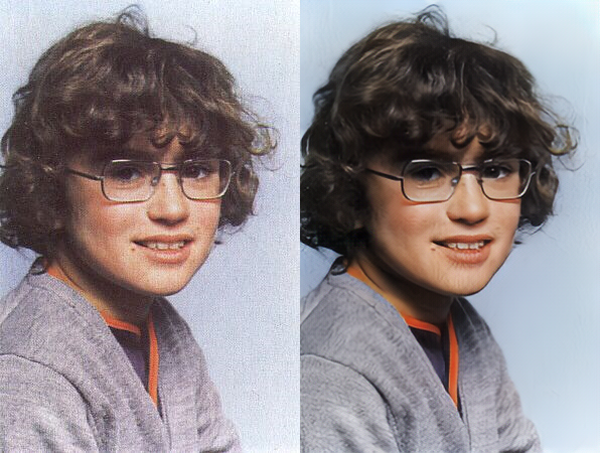

b.png


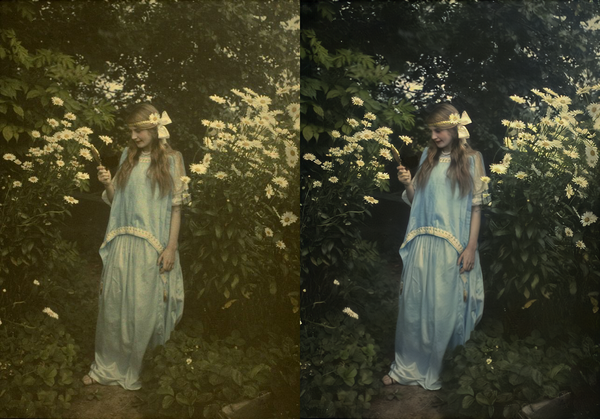

c.png


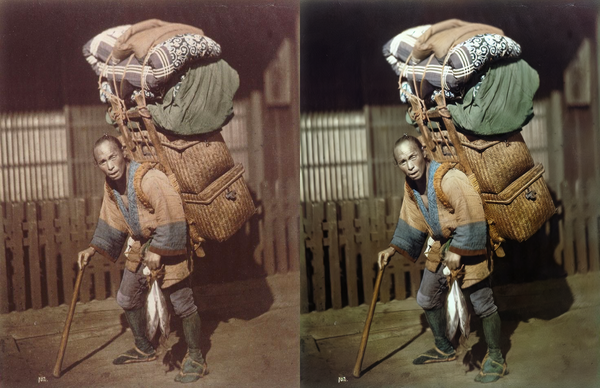

d.png


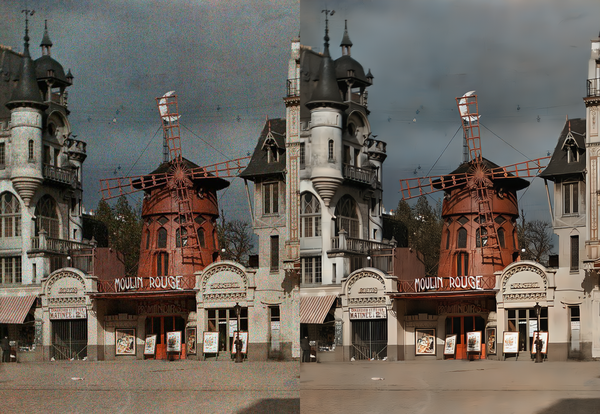

e.png


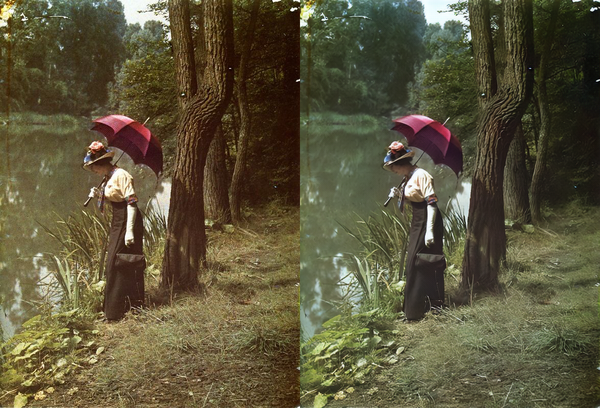

f.png


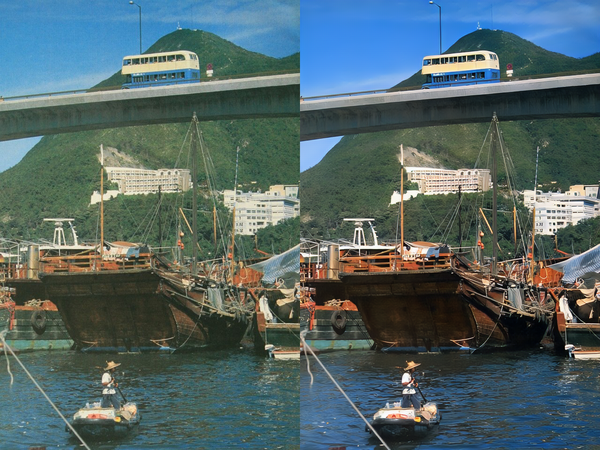

g.png


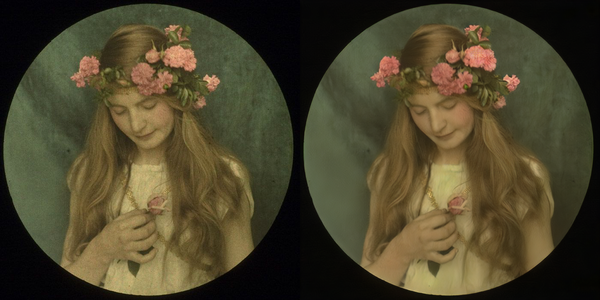

h.png


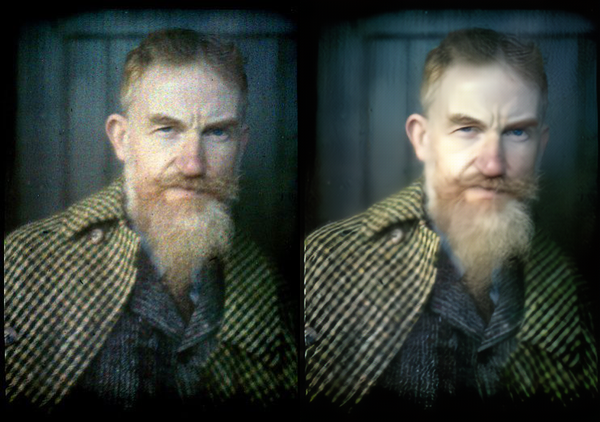

In [6]:
%cd /content/photo_restoration
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

### Restore the photos with scratches

In [7]:
%cd /content/photo_restoration
!rm -rf ./output/*
!python run.py --input_folder /content/photo_restoration/test_images/old_w_scratch/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch

/content/photo_restoration
Running Stage 1: Overall restoration
initializing the dataloader
/content/photo_restoration/Global/detection.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

/content/photo_restoration
a.png


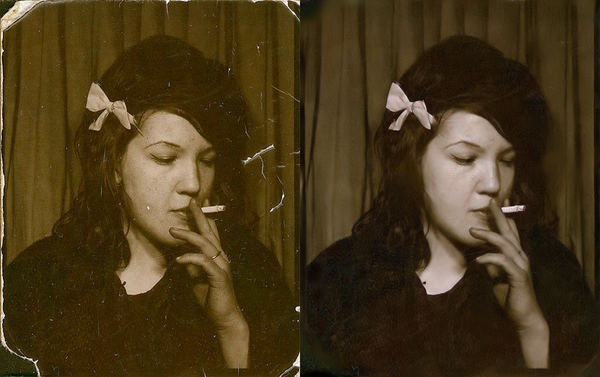

b.png


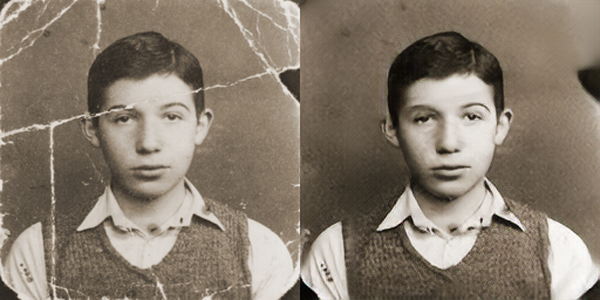

c.png


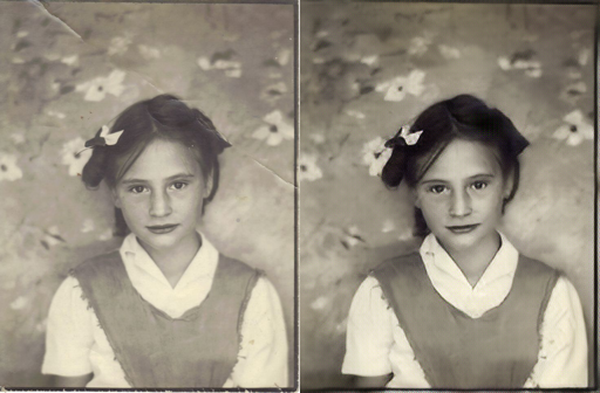

d.png


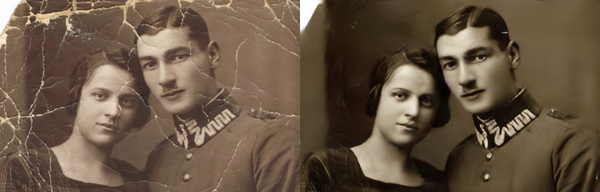

In [8]:
%cd /content/photo_restoration
input_folder = "test_images/old_w_scratch"
output_folder = "output"
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

#◢ Try it on your own photos!

In [9]:
from google.colab import files
import shutil

upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

Saving Abdul-Baha-pens-letter-in-Holy-Land.jpg to Abdul-Baha-pens-letter-in-Holy-Land.jpg


Run the processing with:

In [10]:
%cd /content/photo_restoration
!rm -rf ./upload_output
!python run.py --input_folder /content/photo_restoration/test_images/upload --output_folder /content/photo_restoration/upload_output --GPU 0 --with_scratch --HR

/content/photo_restoration
Running Stage 1: Overall restoration
initializing the dataloader
/content/photo_restoration/Global/detection.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

### Visualize

Now you have all your results under the folder `upload_output` and you can *manually* right click and download them.

Here we use the child photos of celebrities from https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/?utm_source=google&utm_medium=organic&utm_campaign=organic

/content/photo_restoration


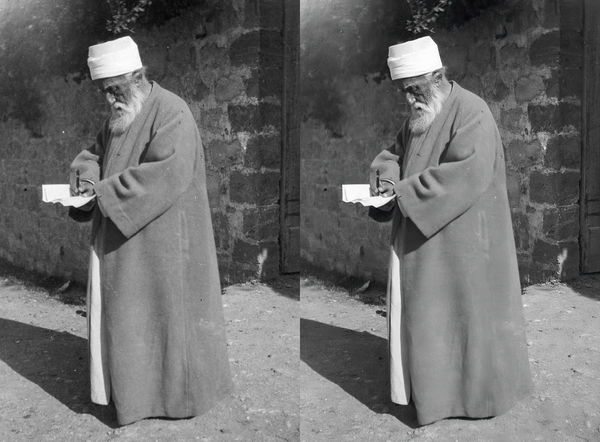

In [11]:
%cd /content/photo_restoration
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "final_output", filename_output))

    display(make_grid(image_original, image_restore))
    print("")

## Download your results



In [12]:
%cd /content/photo_restoration
output_folder = os.path.join(upload_output_path, "final_output")
print(output_folder)
os.system(f"zip -r -j download.zip {output_folder}/*")
files.download("download.zip")

/content/photo_restoration
/content/photo_restoration/upload_output/final_output


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>